In [ ]:
#@title Part 1 { form-width: "200px" }

"""
Player 1 starting position: 9
Player 2 starting position: 3
"""
P1START=9
P2START=3

from numba import njit
import timeit


def part1():
    p1=P1START-1
    p2=P2START-1
    s1=s2=0

    d = 1

    while True:
        p1 += (3*d+3)
        p1 %= 10
        s1 += p1 + 1
        d += 3
        if s1>=1000:
            r = s2
            break

        p2 += (3*d+3)
        p2 %= 10
        s2 += p2 + 1
        r = s2
        d += 3
        if s2>=1000:
            r = s1
            break
    return r * (d-1)

@njit
def jittedp1():
    p1=9-1
    p2=3-1
    s1=s2=0

    d = 1

    while True:
        p1 += (3*d+3)
        p1 %= 10
        s1 += p1 + 1
        d += 3
        if s1>=1000:
            r = s2
            break

        p2 += (3*d+3)
        p2 %= 10
        s2 += p2 + 1
        r = s2
        d += 3
        if s2>=1000:
            r = s1
            break
    return r * (d-1)


print("part1   ", part1())
print("jittedp1", jittedp1())

print("part1    timeit", timeit.timeit("part1()", "from __main__ import part1", number=10000))
print("jittedp1 timeit", timeit.timeit("jittedp1()", "from __main__ import jittedp1", number=10000))

part1    1073709
jittedp1 1073709
part1    timeit 2.2940890240000016
jittedp1 timeit 0.016440405000004432


In [ ]:
#@title Part 2 { form-width: "200px" }
from numba import njit
import timeit

P1START=9
P2START=3

def part2():
    games=[(P1START-1,0,P2START-1,0,1)]

    dice = {
    3: 1,
    4: 3,  # 1+1+2 2+1+1 1+2+1
    5: 6,  # 1+2+2 2+2+1 2+1+2 1+1+3 3+1+1 1+3+1
    6: 7,  # 123 132 213 231 312 321 222
    7: 6,
    8: 3,
    9: 1,
    }
    win_p1=win_p2=0

    while games:
        new_games = []
        for game in games:
            p1, score1, p2, score2, universes_count = game
            for d1,weight1 in dice.items():
                new_p1 = p1 + d1
                new_p1 %= 10
                new_score1 = score1 + new_p1 + 1
                if new_score1>=21:
                    win_p1 += weight1 * universes_count
                else:
                    for d2,weight2 in dice.items():
                        new_p2 = p2 + d2
                        new_p2 %= 10
                        new_score2 = score2 + new_p2 + 1
                        if new_score2>=21:
                            win_p2 += weight2 * universes_count
                        else:
                            new_games.append(
                                (new_p1,new_score1,new_p2,new_score2, universes_count*weight1*weight2)
                                )

        games = new_games
    return max((win_p1, win_p2))

@njit
def jittedp2():
    games=[(P1START-1,0,P2START-1,0,1)]

    dice = {
    3: 1,
    4: 3,  # 1+1+2 2+1+1 1+2+1
    5: 6,  # 1+2+2 2+2+1 2+1+2 1+1+3 3+1+1 1+3+1
    6: 7,  # 123 132 213 231 312 321 222
    7: 6,
    8: 3,
    9: 1,
    }
    win_p1=win_p2=0

    while games:
        new_games = []
        for game in games:
            p1, score1, p2, score2, universes_count = game
            for d1,weight1 in dice.items():
                new_p1 = p1 + d1
                new_p1 %= 10
                new_score1 = score1 + new_p1 + 1
                if new_score1>=21:
                    win_p1 += weight1 * universes_count
                else:
                    for d2,weight2 in dice.items():
                        new_p2 = p2 + d2
                        new_p2 %= 10
                        new_score2 = score2 + new_p2 + 1
                        if new_score2>=21:
                            win_p2 += weight2 * universes_count
                        else:
                            new_games.append(
                                (new_p1,new_score1,new_p2,new_score2, universes_count*weight1*weight2)
                                )

        games = new_games
    return max((win_p1, win_p2))
#
# print("part2   ", part2())
print("jittedp2", jittedp2())

print("part2    timeit", timeit.timeit("part2()", "from __main__ import part2", number=1))
print("jittedp2 timeit", timeit.timeit("jittedp2()", "from __main__ import jittedp2", number=1))

jittedp2 148747830493442
part2    timeit 27.29517536099999
jittedp2 timeit 1.5255601590000083


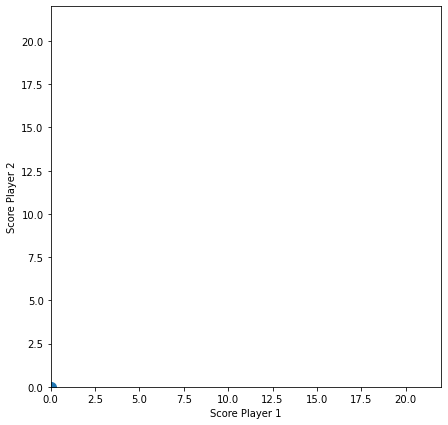

In [ ]:
# matplotlib bubble plot
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import matplotlib.animation as animation

from matplotlib import rc
matplotlib.rcParams['animation.embed_limit'] = 209715200
rc('animation', html='jshtml')
figsize = 7
fig = plt.figure(figsize=(figsize,figsize))

P1START=9
P2START=3

def theplot():
    games=[(P1START-1,0,P2START-1,0,1)]

    dado = {
    3: 1,
    4: 3,  # 1+1+2 2+1+1 1+2+1
    5: 6,  # 1+2+2 2+2+1 2+1+2 1+1+3 3+1+1 1+3+1
    6: 7,  # 123 132 213 231 312 321 222
    7: 6,
    8: 3,
    9: 1,
    }
    while games:
        new_games = []
        yield games
        for game in games:
            p1, score1, p2, score2, universi = game
            for d1,peso1 in dado.items():
                new_p1 = p1 + d1
                new_p1 %= 10
                new_score1 = score1 + new_p1 + 1
                if new_score1>=21:
                    pass
                else:
                    for d2,peso2 in dado.items():
                        new_p2 = p2 + d2
                        new_p2 %= 10
                        new_score2 = score2 + new_p2 + 1
                        if new_score2>=21:
                            pass
                        else:
                            new_games.append(
                                (new_p1,new_score1,new_p2,new_score2, universi*peso1*peso2)
                                )

        games = new_games

ax = fig.add_subplot()

def plot_callback(data):
    ax.clear()
    ax.set_xlim(0, 22)
    ax.set_ylim(0, 22)
    # ax.set_zlim(-4000, 3000)
    X = [x[1] for x in data]
    Y = [x[3] for x in data]
    S = [x[4] for x in data]
    mS = max(S)  # 148747830493442
    S = [x*100/mS for x in S]
    ax.scatter(X, Y, marker='o', s=S)
    ax.set_xlabel('Score Player 1')
    ax.set_ylabel('Score Player 2')
    # ax.set_zlabel('Z Label')

pam_ani = animation.FuncAnimation(fig, plot_callback, frames = theplot, fargs=(), save_count = 200)
# pam_ani.save('y2021ex21.mp4', fps=1, extra_args=['-vcodec', 'libx264'])
# from google.colab import files
# files.download('y2021ex21.mp4')
pam_ani

In [ ]:
#@title part 2 GPU { form-width: "200px" }
from numba import njit, cuda, typed, int64
import numpy as np
import timeit

P1START=9
P2START=3

@cuda.jit  # ('void(int64[:,:], int64[:,:])')
def oneturn(games, output, start, stop, count, op1, op2):
    dice = (
        (3, 1),
        (4, 3),  # 1+1+2 2+1+1 1+2+1
        (5, 6),  # 1+2+2 2+2+1 2+1+2 1+1+3 3+1+1 1+3+1
        (6, 7),  # 123 132 213 231 312 321 222
        (7, 6),
        (8, 3),
        (9, 1),
    )

    pos = cuda.grid(1)
    step = cuda.gridsize(1)

    window_size = games.shape[0] // step + 1
    istart = pos * window_size

    count[pos] = 0
    o_idx = istart * 49
    start[pos] = o_idx
    ig = istart
    win_p1=win_p2=0
    while ig < istart+window_size and ig<games.shape[0]:
        p1, score1, p2, score2, universes_count = games[ig]  # game[0],game[1],game[2],game[3],game[4]  # games[idx], games[idx+1], games[idx+2], games[idx+3], games[idx+4]
        for i1, (d1,weight1) in enumerate(dice):
            new_p1 = p1 + d1
            new_p1 %= 10
            new_score1 = score1 + new_p1 + 1
            if new_score1>=21:
                    win_p1 += weight1 * universes_count
            else:
                for i2, (d2,weight2) in enumerate(dice):
                    new_p2 = p2 + d2
                    new_p2 %= 10
                    new_score2 = score2 + new_p2 + 1
                    if new_score2>=21:
                        win_p2 += weight2 * universes_count
                    else:
                        output[o_idx][0] = new_p1
                        output[o_idx][1] = new_score1
                        output[o_idx][2] = new_p2
                        output[o_idx][3] = new_score2
                        output[o_idx][4] = universes_count*weight1*weight2
                        o_idx+=1
        ig += 1
    stop[pos] = o_idx
    count[pos] = o_idx - start[pos]
    op1[pos] += win_p1
    op2[pos] += win_p2


@cuda.reduce
def sum_reduce(a, b):
    return a + b


@cuda.jit
def pack(_in, out, start, stop, count):
    pos = cuda.grid(1)
    step = cuda.gridsize(1)

    idx = 0
    for i in range(pos):
        idx += count[i]

    a = start[pos]
    b = stop[pos]
    for j in range(a, b):
        for jj in range(5):
            out[idx][jj] = _in[j][jj]
        idx += 1


def part2():
    BLOCKS = 512
    THREADS = 16

    games= np.array([[P1START-1,0,P2START-1,0,1]], np.dtype(np.int64))
    d_games = cuda.to_device(games)
    p1 = cuda.to_device(np.zeros((BLOCKS*THREADS,), np.dtype(np.int64)))
    p2 = cuda.to_device(np.zeros((BLOCKS*THREADS,), np.dtype(np.int64)))
    start = cuda.device_array((BLOCKS*THREADS,), np.dtype(np.int64))
    stop = cuda.device_array((BLOCKS*THREADS,), np.dtype(np.int64))
    count = cuda.device_array((BLOCKS*THREADS,), np.dtype(np.int64))
    while d_games.size>0:
        d_new_games = cuda.device_array((d_games.shape[0]*49, d_games.shape[1]), np.dtype(np.int64))
        oneturn[BLOCKS,THREADS](d_games, d_new_games, start, stop, count, p1, p2)
        current_games_count = sum_reduce(count)
        d_packed_games = cuda.device_array((current_games_count, d_games.shape[1]), np.dtype(np.int64))
        pack[BLOCKS,THREADS](d_new_games,d_packed_games,start,stop,count)
        d_games = d_packed_games

    return max((sum_reduce(p1), sum_reduce(p2)))


@njit
def jittedp2():
    games=[(9-1,0,3-1,0,1)]

    dice = {
    3: 1,
    4: 3,  # 1+1+2 2+1+1 1+2+1
    5: 6,  # 1+2+2 2+2+1 2+1+2 1+1+3 3+1+1 1+3+1
    6: 7,  # 123 132 213 231 312 321 222
    7: 6,
    8: 3,
    9: 1,
    }
    win_p1=win_p2=0

    while games:
        new_games = []
        for game in games:
            p1, score1, p2, score2, universes_count = game
            for d1,weight1 in dice.items():
                new_p1 = p1 + d1
                new_p1 %= 10
                new_score1 = score1 + new_p1 + 1
                if new_score1>=21:
                    win_p1 += weight1 * universes_count
                else:
                    for d2,weight2 in dice.items():
                        new_p2 = p2 + d2
                        new_p2 %= 10
                        new_score2 = score2 + new_p2 + 1
                        if new_score2>=21:
                            win_p2 += weight2 * universes_count
                        else:
                            new_games.append(
                                (new_p1,new_score1,new_p2,new_score2, universes_count*weight1*weight2)
                                )

        games = new_games
    return max((win_p1, win_p2))

print("jittedp2 ", jittedp2())
print("GPU part2", part2())

print("jittedp2  timeit", timeit.timeit('jittedp2()', "from __main__ import jittedp2", number=1))
print("GPU part2 timeit", timeit.timeit('part2()', "from __main__ import part2", number=1))


/usr/local/lib/python3.7/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 64 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.7/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


GPU part2 148747830493442
jittedp2  148747830493442
GPU part2 timeit 0.08660070399992037
jittedp2  timeit 1.3491402509998807
